In [2]:
import matplotlib.pyplot as plt
import numpy as np

import fnmatch
import os
import pickle

os.chdir('/usr3/graduate/qdo/EEGData')
EEG1 = []
EEG2 = []
for file in sorted(os.listdir('.')):
    if fnmatch.fnmatch(file, '2021*'):
        #print(file)
        try:
            with open(file,'rb') as f:
                d = pickle.load(f)
                if (d.shape[1] == 3600001):
                    EEG1.append(d[0,1:]) #.reshape(-1))
                    EEG2.append(d[1,1:]) #.reshape(-1))
        except:
            pass

#EEG1 = np.asarray(EEG1)
#EEG2 = np.asarray(EEG2)

EEG1 = np.asarray(EEG1)
EEG2 = np.asarray(EEG2)
#EEG1 = np.reshape(EEG1,(42,-1))
#num_samples = data[0,:].size
#data = np.reshape(data,(2,45))
print(EEG1.shape)
print(EEG2.shape)

data = np.hstack(EEG2)
print(data.shape)

(41, 3600000)
(41, 3600000)
(147600000,)


In [ ]:
K = EEG2.shape[0]                            # Get the number of trials.
f, a = plt.subplots(figsize=(6, 6))            # Make a square axis
a.imshow(EEG2[:,8000:10000],                               #... and show the image,
           extent=[0, 1, K, 1],  # ... with meaningful axes,
           aspect='auto')                  # ... and a nice aspect ratio.
plt.xlabel('Minutes [s]')
plt.ylabel('Trial/Hr #');
plt.title('All trials from E2')
plt.show()

f, a = plt.subplots()
a.plot(EEG1[4,8000:10000]-2, 'b')            # Plot the data from the first trial of one electrode,
a.plot(EEG2[4,8000:10000]-2, 'r')            # ... and the first trial of the other electrode.
plt.xlabel('Time [s]');
plt.ylabel('Voltage [mV]');
fig, ax = {'traces': f}, {'traces': a}

In [ ]:
f, a = plt.subplots(20, 1, figsize=(40, 40))
t = np.arange(0,4000,1)

for j in range(20):
    a[j].plot(t/1000,EEG1[j,50000:54000]-2, 'b')            # Plot the data from trial j of one electrode,
    a[j].plot(t/1000,EEG2[j,50000:54000]-2, 'r')            # ... and trial j of the other electrode.
    a[j].set_ylabel('Trial ' + str(j ))
plt.xlabel('Time [s]');


In [ ]:
from scipy import signal
from numpy.fft import fft, rfft

dt = 1/1000                # Define the sampling interval,
T = 3600             # ... the duration of the data,
N = len(EEG1[27,:])                   # ... and the no. of data points
LFP = EEG1[27,:]
x = signal.hann(N) * LFP            # Multiply data by a Hanning taper
xf = rfft(x - x.mean())         # Compute Fourier transform
Sxx = 2*dt**2/T * (xf*xf.conj()) # Compute the spectrum
Sxx = Sxx.real               # Ignore complex components

df = 1 / T                     # Define frequency resolution,
fNQ = 1 / dt / 2                # ... and Nyquist frequency. 

faxis = np.arange(0, fNQ + df, df) # Construct freq. axis
plt.plot(faxis, 10 * np.log10(Sxx))    # Plot spectrum vs freq.
plt.xlim([0, 100])                  # Set freq. range, 
plt.ylim([-80, 0])                  # ... and decibel range
plt.xlabel('Frequency [Hz]')        # Label the axes
plt.ylabel('Power [mV$^2$/Hz]');

In [ ]:
LFP = EEG1[9,:]-2
t = np.arange(0,3600000,1)

from scipy import signal
Wn = [5,7];                         # Set the passband [5-7] Hz,
n = 100;                            # ... and filter order,
                                    # ... build the bandpass filter,
b = signal.firwin(n, Wn, nyq=fNQ, pass_zero=False, window='hamming');
Vlo = signal.filtfilt(b, 1, LFP);   # ... and apply it to the data.

Wn = [80, 120];                     # Set the passband [80-120] Hz,
n = 100;                            # ... and filter order,
                                    # ... build the bandpass filter,
b = signal.firwin(n, Wn, nyq=fNQ, pass_zero=False, window='hamming');
Vhi = signal.filtfilt(b, 1, LFP);   # ... and apply it to the data.

plt.figure(figsize=(14, 4))         # Create a figure with a specific size.
plt.plot(t/1000,LFP)                    # Plot the original data vs time.
plt.plot(t/1000,Vlo)                    # Plot the low-frequency filtered data vs time.
plt.plot(t/1000,Vhi)                    # Plot the high-frequency filtered data vs time.
plt.xlabel('Time [s]')
plt.ylabel('Voltage [mV]')

plt.xlim([80, 82]);                 # Choose a 2 s interval to examine
#plt.ylim([-2, 2]);
plt.legend(['LFP', 'Vlo', 'Vhi']);  # Add a legend.

In [ ]:
from scipy.signal import firwin, lfilter, filtfilt

chosentime = 100
EEG = data #(data[0,:]).reshape(-1)  
#t = data['t'][0]               # ... and a time axis.
dt = 1/1000  #t[1] - t[0]               # Define the sampling interval.
fNQ = 1 / dt / 2           # Determine the Nyquist frequency.
print(fNQ)
t = np.arange(0,len(EEG)/1000,1/1000)
n = 100                       # Define the filter order
Wn = 100 / fNQ                  # ... and specify the cutoff frequency,
b = firwin(n, Wn)              # ... build lowpass FIR filter,
                               # ... and zero-phase filter each trial
eeg_lo = filtfilt(b, 1, EEG)

#mn = eeg_lo.mean(0)            # Compute mean of filtered EEG across trials (ERP)
#sd = eeg_lo.std(0)             # Compute std of filtered EEG data across trials.
#sdmn = sd / sqrt(K);           # Compute the std of the mean.

plt.plot(t/3600,eeg_lo)                    # Plot the ERP of the filtered data
#plot(t, mn + 2 * sdmn, 'r:');  # ... and the confidence intervals,
#plot(t, mn - 2 * sdmn, 'r:');
#plt.xlim(0,2)
#plt.ylim(-0.2,0.4)
plt.xlabel('Time [s]')             # ... and label the axes.
plt.ylabel('Voltage [ mV]')
plt.title('Filtered EEG v1/v2')
plt.show()

EEG2 = (data[1,:]-2).reshape(-1)  
#t = data['t'][0]               # ... and a time axis.
dt = 1/1000#t[1] - t[0]               # Define the sampling interval.
fNQ = 1 / dt / 2               # Determine the Nyquist frequency.
print(fNQ)
t = np.arange(0,len(EEG2)/1000,1/1000)
n = 100                       # Define the filter order
Wn = 100 / fNQ                  # ... and specify the cutoff frequency,
b = firwin(n, Wn)              # ... build lowpass FIR filter,
                               # ... and zero-phase filter each trial
eeg_lo2 = filtfilt(b, 1, EEG2)

#mn = eeg_lo.mean(0)            # Compute mean of filtered EEG across trials (ERP)
#sd = eeg_lo.std(0)             # Compute std of filtered EEG data across trials.
#sdmn = sd / sqrt(K);           # Compute the std of the mean.

plt.plot(t/3600,eeg_lo2)                    # Plot the ERP of the filtered data
#plot(t, mn + 2 * sdmn, 'r:');  # ... and the confidence intervals,
#plot(t, mn - 2 * sdmn, 'r:');
#plt.xlim(0,2)
#plt.ylim(-0.2,0.4)
plt.xlabel('Time [s]')             # ... and label the axes.
plt.ylabel('Voltage [ mV]')
plt.title('Filtered EEG FOF')
plt.show()

In [3]:
from numpy import where
from pylab import *                             # Import plotting functions

from numpy.fft import fft, rfft
from scipy.signal import spectrogram
#rcParams['figure.figsize']=(12,3)               # Change the default figure size

#data = loadmat('matfiles/EEG-1.mat')  # Load the EEG data
EEG = data #[0,10:].reshape(-1)         # Extract the EEG variable
#t = data['t'][0]                      # ... and the t variable

x = EEG                            # Relabel the data variable
dt = 1/1000                     # Define the sampling interval
N = int(x.shape[0])                     # Define the total number of data points
T = N * dt  #/4                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[:int(len(x) / 2)]           # Ignore negative frequencies
#Sxx = Sxx[:int(N / 2)]   
df = 1 / T  #.max()                      # Determine frequency resolution
fNQ = 1 / dt / 2                      # Determine Nyquist frequency
faxis = arange(0,fNQ,df)              # Construct frequency axis






/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/numpy-1.19.5-py3.8-linux-x86_64.egg/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-4-1105cee260df>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax[2].pcolormesh(t/3600, f, 10 * log10(Sxx),


Text(0, 0.5, 'Frequency [Hz]')

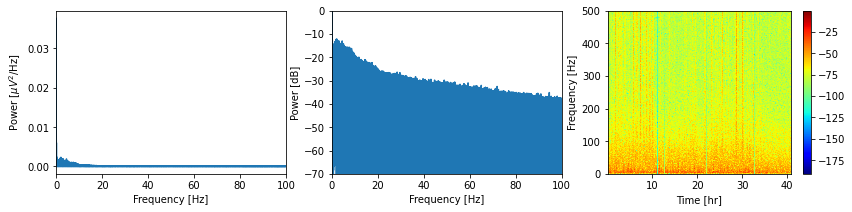

In [4]:
rcParams["figure.figsize"] = (14,3)
fig,ax = subplots(1,3)
ax[0].plot(faxis[:], Sxx.real)                 # Plot spectrum vs frequency
ax[0].set_xlim([0, 100])                        # Select frequency range
ax[0].set_xlabel('Frequency [Hz]')              # Label the axes
ax[0].set_ylabel('Power [$\mu V^2$/Hz]')
#show()

ax[1].plot(faxis[:], 10 * log10(Sxx / max(Sxx)))  # Plot the spectrum in decibels.
ax[1].set_xlim([0, 100])                           # Select the frequency range.
ax[1].set_ylim([-70, 0])                           # Select the decibel range.
ax[1].set_xlabel('Frequency [Hz]')                 # Label the axes.
ax[1].set_ylabel('Power [dB]')
#show()

Fs = 1 / dt               # Define the sampling frequency,
interval = int(Fs)        # ... the interval size,
overlap =  int(Fs * 0.95) # ... and the overlap intervals

                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcm = ax[2].pcolormesh(t/3600, f, 10 * log10(Sxx),
               cmap='jet')# Plot the result
fig.colorbar(pcm, ax=ax[2])
#ax[2].colorbar()                # ... with a color bar,
#ylim([0, 100])             # ... set the frequency range,
#xlim([0,20])
ax[2].set_xlabel('Time [hr]')        # ... and label the axes
ax[2].set_ylabel('Frequency [Hz]')
#savefig('imgs/3-14')

In [ ]:
from numpy import where
from pylab import *                             # Import plotting functions

from numpy.fft import fft, rfft
from scipy.signal import spectrogram
#rcParams['figure.figsize']=(12,3)               # Change the default figure size

#data = loadmat('matfiles/EEG-1.mat')  # Load the EEG data
EEG = data[1,10:].reshape(-1)         # Extract the EEG variable
#t = data['t'][0]                      # ... and the t variable

x = EEG                            # Relabel the data variable
dt = 1/1000                     # Define the sampling interval
N = int(x.shape[0])                     # Define the total number of data points
T = N * dt  #/4                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[:int(len(x) / 2)]           # Ignore negative frequencies
#Sxx = Sxx[:int(N / 2)]   
df = 1 / T  #.max()                      # Determine frequency resolution
fNQ = 1 / dt / 2                      # Determine Nyquist frequency
faxis = arange(0,fNQ,df)              # Construct frequency axis

rcParams["figure.figsize"] = (14,3)
fig,ax = subplots(1,3)
ax[0].plot(faxis[:], Sxx.real)                 # Plot spectrum vs frequency
ax[0].set_xlim([0, 100])                        # Select frequency range
ax[0].set_xlabel('Frequency [Hz]')              # Label the axes
ax[0].set_ylabel('Power [$\mu V^2$/Hz]')
#show()

ax[1].plot(faxis[:], 10 * log10(Sxx / max(Sxx)))  # Plot the spectrum in decibels.
ax[1].set_xlim([0, 100])                           # Select the frequency range.
ax[1].set_ylim([-70, 0])                           # Select the decibel range.
ax[1].set_xlabel('Frequency [Hz]')                 # Label the axes.
ax[1].set_ylabel('Power [dB]')
#show()

Fs = 1 / dt               # Define the sampling frequency,
interval = int(Fs)        # ... the interval size,
overlap =  int(Fs * 0.95) # ... and the overlap intervals

                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcm = ax[2].pcolormesh(t/3600, f, 10 * log10(Sxx),
               cmap='jet')# Plot the result
fig.colorbar(pcm, ax=ax[2])
#ax[2].colorbar()                # ... with a color bar,
#ylim([0, 100])             # ... set the frequency range,
#xlim([0,20])
ax[2].set_xlabel('Time [s]')        # ... and label the axes
ax[2].set_ylabel('Frequency [Hz]')
#savefig('imgs/3-14')



In [ ]:
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcm = ax[2].pcolormesh(t/3600, f, 10 * log10(Sxx),
               cmap='jet')# Plot the result
colorbar(pcm, ax=ax[2])